# **Stock Market Analysis**




# **Introduction**

In this Project, we will explore the process of analyzing stock market data using Python. The goal is to gain insights into historical price movements, trends, and basic statistical properties of a chosen stock over a specific period. We will retrieve the data programmatically and then use various Python libraries to clean, explore, visualize, and perform some basic time series analysis.


Time-series data consists of observations indexed in chronological order. Since it is present in many real-world scenarios, effective manipulation and analysis of time-series data is an essential skill for any data analyst or data scientist.
In this notebook, we will focus on exploring stock market data—specifically, data from major technology companies like Apple, Tesla, Google, and Meta
.


# **Key Points We Will Cover:**

**Data Acquisition:** Using yfinance to fetch historical stock price data directly into our notebook.

**Data Handling:** Utilizing pandas to manipulate and preprocess the time series data.

**Visualization:** Employing matplotlib and seaborn to create clear, informative plots that help in understanding trends and patterns in the stock data.

**Basic Analysis:** Calculating summary statistics, rolling averages, and daily returns to observe the stock’s behavior over time.

By the end of this exercise, you will have a better understanding of how to integrate Python libraries for data analysis tasks, specifically in the context of stock market data.

# **Getting the Data**

Our first step is to download and load the data into memory. We will source our stock data from Yahoo Finance, which provides a wide range of financial market information. To access this data, we’ll use the yfinance library. This library makes it easy to download historical market data directly from Yahoo Finance making it compatible with Python. If you’d like more details on how yfinance works, you can find them in this helpful article.

# **1. What was the change in price of the stock overtime?**

In this section, we focus on gathering and preparing the historical stock data that we will later use to understand how prices change over time. We begin by installing and importing the necessary libraries, set up our time range for analysis, and then use the yfinance library to download data for four major tech companies: Apple, Google, Meta, and Tesla. Finally, we combine all these individual datasets into one DataFrame, which will serve as a unified source for our exploratory analysis.
By doing this, we lay the groundwork for visualizing and analyzing price changes over time, which directly helps us address our first question

In [ ]:
# Installs the yfinance library, which allows us to download stock data directly from Yahoo Finance.

!pip install -q yfinance

In [ ]:
# Imports pandas for data manipulation and numpy for numerical operation.

import pandas as pd
import numpy as np

# Imports matplotlib and seaborn for plotting.

import matplotlib.pyplot as plt
import seaborn as sns

# Sets a white grid background style for seaborn to improve visualization readability.
# Applies the "fivethirtyeight" style to give plots a clean and modern look.%matplotlib inline ensures that plots appear directly in the notebook output.

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Importing DataReader from pandas_datareader.data for fetching financial data.

from pandas_datareader.data import DataReader

# Importing yfinance library for accessing financial data from Yahoo Finance.

import yfinance as yf

# Importing the data module as 'pdr' from pandas_datareader for convenience.

from pandas_datareader import data as pdr

# Importing graph objects module from Plotly for creating visualizations.
import plotly.graph_objects as go



# Importing datetime and timedelta from the datetime module for working with time stamps.
from datetime import datetime,timedelta




In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'TSLA', 'META', 'GOOG'] # Define a list of stock tickers for Apple, Tesla, Meta, and Google.

# Define the date range for stock data
end = datetime.now().date() # Set the end date as today's date.
start = datetime(end.year - 1, end.month, end.day).date() # Set the start date as one year prior to the end date.

# Loop through each stock ticker in the list and download its data
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    # Dynamically create variables (e.g., AAPL, TSLA) to store the downloaded stock data for each ticker.

# Create a list of DataFrames corresponding to the downloaded stock data
company_list = [AAPL, TSLA, META, GOOG] # Store the stock data for Apple, Tesla, Meta, and Google in a list.
company_name = ["APPLE", "TESLA", "META", "Google"] # Define a corresponding list of company names.

# Add a 'company_name' column to each DataFrame for identification
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name # Add a new column named 'company_name' to indicate the stock's company.

# Combine all the individual DataFrames into a single DataFrame
df = pd.concat(company_list, axis=0) # Concatenate the individual stock DataFrames along the row axis.

# Display the last 10 rows of the combined DataFrame
df.tail(10)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   TSLA  TSLA   
Date                                                                            
2024-11-25       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-11-26       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-11-27       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-11-29       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-12-02       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-12-03       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-12-04       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-12-05       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-12-06       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   
2024-12-09       NaN   NaN  NaN  NaN  NaN    NaN       Google       NaN   NaN   

Price      High  ...       Low Open Volume   Adj Close       Close  \
Ticker     TSLA  ... META META META   META        GOOG        GOOG   
Date             ...                                                 
2024-11-25  NaN  ...  NaN  NaN  NaN    NaN  169.237991  169.429993   
2024-11-26  NaN  ...  NaN  NaN  NaN    NaN  170.426651  170.619995   
2024-11-27  NaN  ...  NaN  NaN  NaN    NaN  170.626434  170.820007   
2024-11-29  NaN  ...  NaN  NaN  NaN    NaN  170.296799  170.490005   
2024-12-02  NaN  ...  NaN  NaN  NaN    NaN  172.783981  172.979996   
2024-12-03  NaN  ...  NaN  NaN  NaN    NaN  172.823944  173.020004   
2024-12-04  NaN  ...  NaN  NaN  NaN    NaN  175.890457  176.089996   
2024-12-05  NaN  ...  NaN  NaN  NaN    NaN  174.112473  174.309998   
2024-12-06  NaN  ...  NaN  NaN  NaN    NaN  176.290009  176.490005   
2024-12-09  NaN  ...  NaN  NaN  NaN    NaN  177.100006  177.100006   

Price             High         Low        Open      Volume  
Ticker            GOOG        GOOG        GOOG        GOOG  
Date                                                        
2024-11-25  170.460007  167.399994  167.990005  21395700.0  
2024-11-26  171.494995  169.429993  169.490005  14937500.0  
2024-11-27  171.139999  169.669998  170.679993  12433400.0  
2024-11-29  170.869995  168.750000  170.059998   9250700.0  
2024-12-02  173.600006  170.270004  170.320007  16593400.0  
2024-12-03  174.320007  172.509995  173.119995  15721500.0  
2024-12-04  176.429993  172.750000  172.779999  18239800.0  
2024-12-05  177.710007  174.009995  177.320007  16145500.0  
2024-12-06  176.839005  173.550003  173.880005  13319500.0  
2024-12-09  178.039993  175.399994  175.714996  19887800.0  

[10 rows x 25 columns]

# **Descriptive Statistics about the Data**

Calling .describe() on our dataset produces descriptive statistics, providing insights into its central tendency, variability, and overall distribution while automatically ignoring any missing values. This method can handle numeric and non-numeric columns, and the nature of the output depends on the type of data in the columns. For more details, see the documentation and notes associated with this function..

In [ ]:
# Generating summary statistics for the TSLA (Tesla) stock DataFrame.
# This includes measures like count, mean, standard deviation, min, max, and quartiles for numerical columns.

TSLA.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,219.515936,219.515936,223.997370,214.924581,219.463387,9.576062e+07
std,49.333650,49.333650,50.543751,47.772706,49.229288,3.342787e+07
min,142.050003,142.050003,144.440002,138.800003,140.559998,3.716760e+07
25%,180.000000,180.000000,184.419998,176.959999,181.900002,7.232360e+07
50%,210.660004,210.660004,215.880005,207.559998,211.880005,8.849100e+07
75%,246.385002,246.385002,250.480003,240.629997,244.619995,1.106870e+08
max,389.790009,389.790009,404.799988,378.010010,397.609985,2.438697e+08


We have only 255 records in one year because weekends are not included in the data.

# **Information About the Data**

Using the .info() method on our DataFrame provides a summary of its structure. This includes details about the index data type, each column's data type, the number of non-null entries in each column, and the memory usage of the DataFrame. This information is essential for understanding the composition of our dataset and identifying any potential issues, such as missing values or incorrect data types.

In [ ]:
# Displaying general information about the TSLA (Tesla) stock DataFrame.
# This includes the data type of each column, the number of non-null entries, and memory usage.

TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-11 to 2024-12-09
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  251 non-null    float64
 1   (Close, TSLA)      251 non-null    float64
 2   (High, TSLA)       251 non-null    float64
 3   (Low, TSLA)        251 non-null    float64
 4   (Open, TSLA)       251 non-null    float64
 5   (Volume, TSLA)     251 non-null    int64  
 6   (company_name, )   251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# **Closing Price**


In this section, we delve into the closing prices of our selected technology stocks—Apple,Tesla, Meta and Google—over the past year. The closing price is the final price at which a stock is traded during the regular trading day and serves as a key indicator for investors to assess a stock's performance over time. By visualizing the historical closing prices, we can observe trends, compare the performance of different stocks, and gain insights into their market behavior

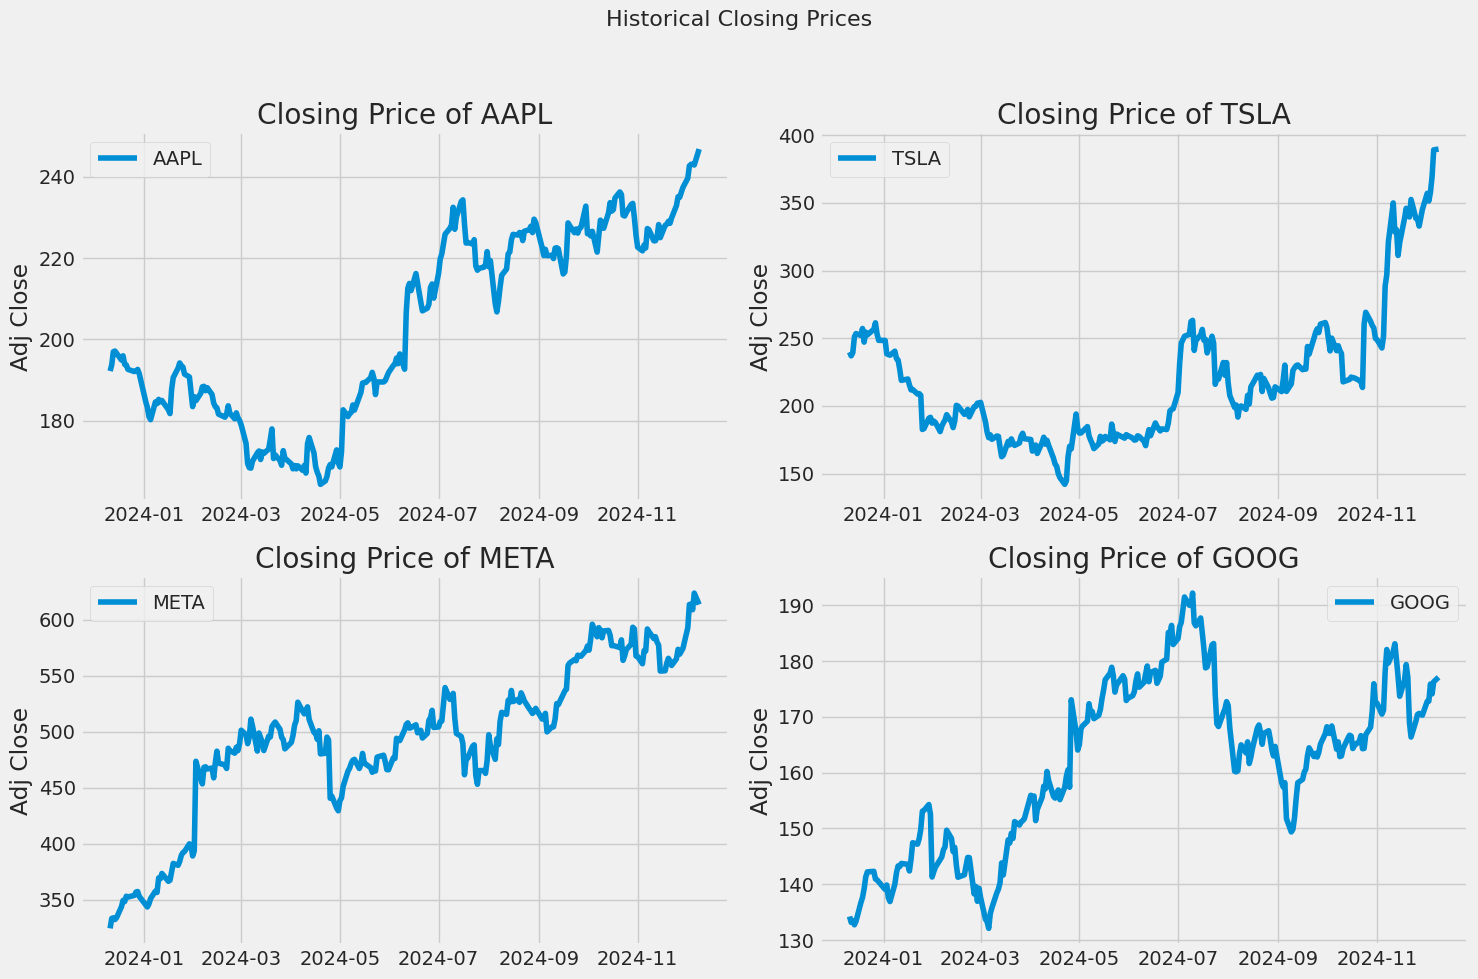

In [ ]:

# Creating a grid of subplots for visualizing the historical closing prices
fig, axes = plt.subplots(2, 2, figsize=(15,10)) # Create a 2x2 grid of subplots with a figure size of 15x10 inches.
fig.suptitle('Historical Closing Prices', fontsize=16) # Add a main title to the entire figure with larger font size.

# Loop through each subplot, company data, and ticker symbol
for ax, company, ticker in zip(axes.flat, company_list, tech_list):
    ax.plot(company['Adj Close'], label=ticker)# Plot the adjusted closing prices for the company on the current subplot.
    ax.set_title(f"Closing Price of {ticker}") # Set the title of the subplot using the ticker symbol.
    ax.set_xlabel('')  # Set an empty label for the x-axis (optional customization).
    ax.set_ylabel('Adj Close') # Label the y-axis to indicate the data represents adjusted closing prices.
    ax.legend() # Add a legend to the subplot to show the ticker symbol.

fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show() # Display the plot.

# **How This Addresses the Question: "What was the change in price of the stock over time?"**

By plotting the Adjusted Closing Prices of Apple, Tesla, Meta and Google over the past year, we create a visual representation of how each stock's price has fluctuated over time. These plots enable us to do data analysis in the following way:

Identify Trends: Observe upward or downward movements in stock prices, indicating overall performance.

Compare Performance: Contrast the volatility and growth of different stocks within the same time frame.

Spot Patterns: Detect recurring patterns or anomalies that may correlate with market events or company-specific news.

This comprehensive visualization provides a clear and immediate understanding of the price changes, helping us quantify and analyze the historical performance of each stock.

# **Volume of Sales Analysis**


In this section, we examine the trading volume of our selected technology stocks—Apple, Tesla, Meta, Google—over the past year. Trading volume represents the number of shares traded within a specific period, typically a day, and is a vital metric for understanding market activity and liquidity. By visualizing daily trading volumes, we can identify trends, gauge investor interest, and recognize significant shifts in market behavior for each stock.


While this section primarily focuses on trading volume rather than price changes, understanding volume is complementary to analyzing price movements. High trading volumes often accompany significant price changes, indicating strong investor interest or reactions to market events. By examining both trading volume and price changes, we gain a more comprehensive view of a stock's performance and market dynamics. This dual analysis helps in identifying patterns such as price rallies accompanied by increasing volume, which can signal bullish trends, or price drops with high volume, which may indicate bearish sentiment.

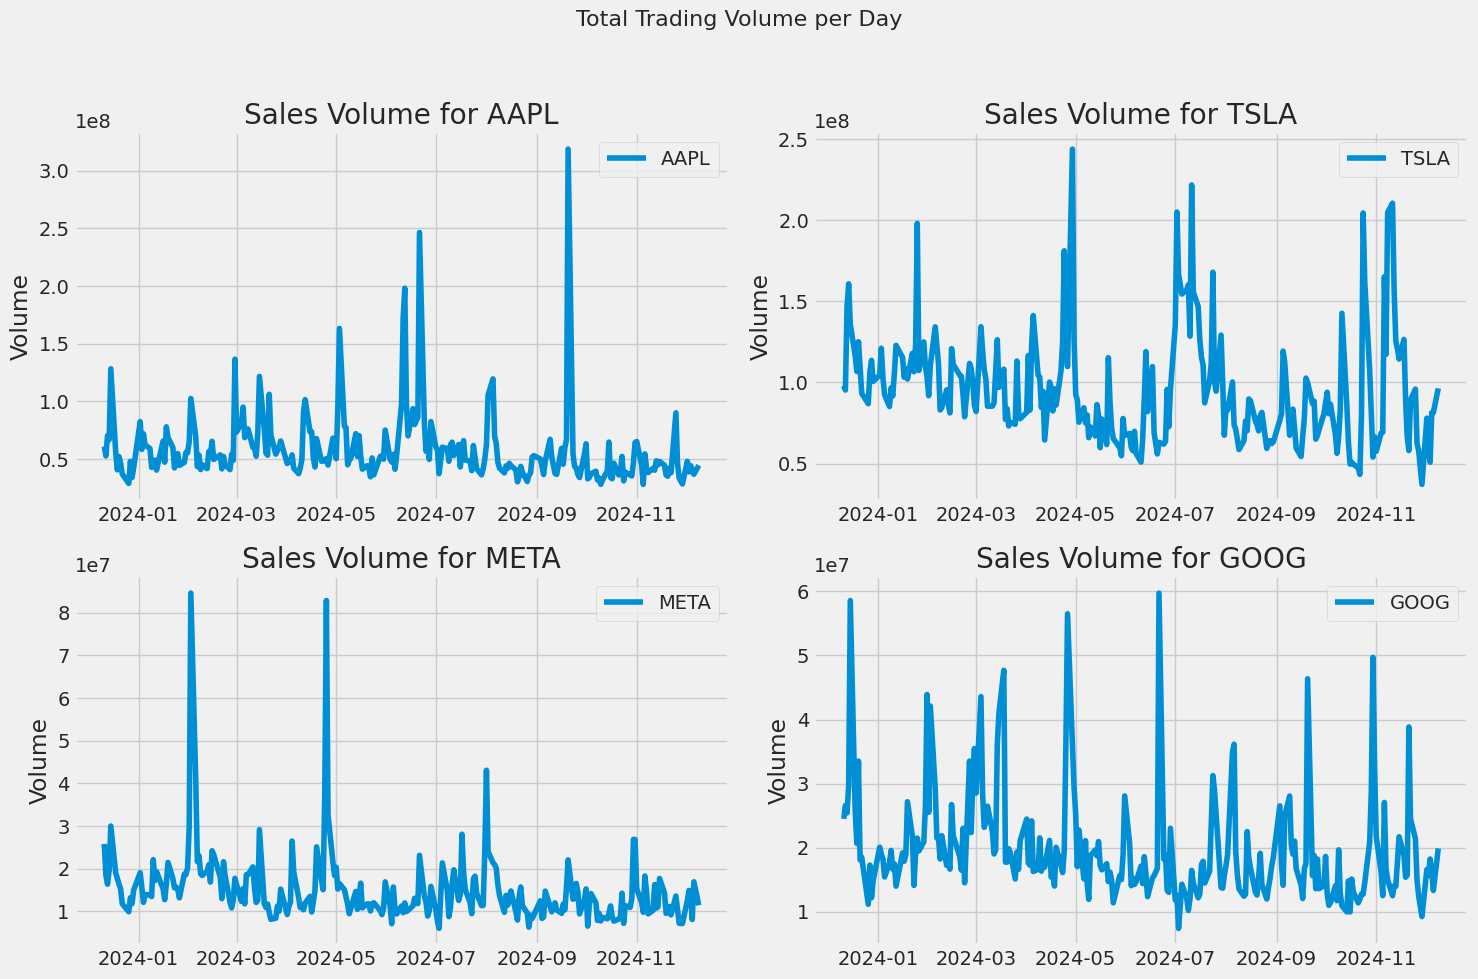

In [ ]:
# Now let's plot the total volume of stock being traded each day
fig, axes = plt.subplots(2, 2, figsize=(15,10)) # Create a 2x2 grid of subplots with a figure size of 15x10 inches.
fig.suptitle('Total Trading Volume per Day', fontsize=16) # Add a main title to the entire figure with a larger font size.

for ax, company, ticker in zip(axes.flat, company_list, tech_list):
    ax.plot(company['Volume'], label=ticker) # Plot the trading volume data for the company on the current subplot.
    ax.set_title(f"Sales Volume for {ticker}") # Set the title of the subplot using the ticker symbol.
    ax.set_ylabel('Volume') # Label the y-axis to indicate the data represents trading volume.
    ax.set_xlabel('') # Set an empty label for the x-axis (optional customization).
    ax.legend() # Add a legend to the subplot to show the ticker symbol.

# Adjust the layout so that the main title fits
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show() #Displaying the plot

By plotting the daily trading volume for Apple, Tesla, Meta, Google, we can observe how actively each stock is being traded over the past year. These visualizations reveal periods of high and low trading activity, which are crucial for technical analysis and making informed investment decisions. Understanding trading volume alongside price changes enhances our ability to interpret market behavior and identify potential investment opportunities.

# **2. What is a Moving Average and Why is It Important?**

In this section, we calculate and visualize the Moving Averages (MA) for our selected stocks—Apple, Google, Tesla, and Meta. Moving Averages help smooth out price data to identify trends over specific periods, making it easier to understand the stock's performance.

# **Importance of Moving Averages:**

**Trend Identification:** Helps in identifying the direction of the trend (uptrend, downtrend, or sideways).

**Support and Resistance Levels:** Acts as dynamic support and resistance levels where prices may react.

**Signal Generation:** Used to generate buy or sell signals based on crossovers (e.g., when a short-term MA crosses above a long-term MA).

**Noise Reduction:** Filters out the "noise" from random price movements, providing a clearer picture of the market sentiment.




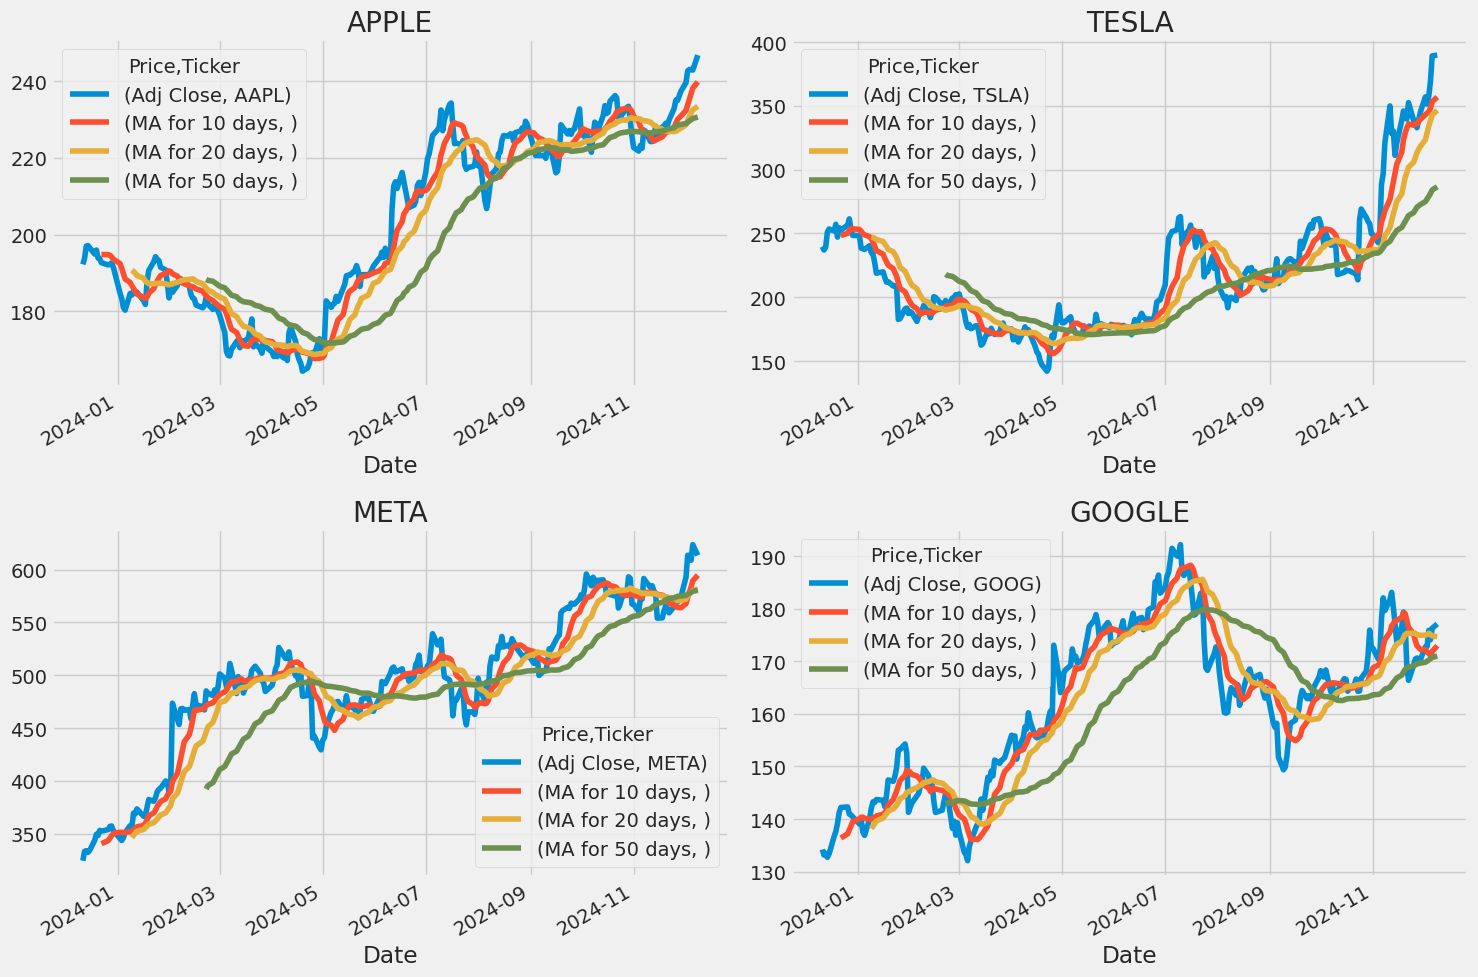

In [ ]:
# Defining a list of moving average window sizes (10, 20, and 50 days).
ma_day = [10, 20, 50]


# Looping through each moving average window size and company DataFrame.
for ma in ma_day:
    for company in company_list:
      # Creating a new column name based on the moving average window size.
        column_name = f"MA for {ma} days"
        # Calculating the moving average of the adjusted closing price for the specified window size.
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Creating a 2x2 grid of subplots for visualizing the adjusted closing price and moving averages.

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotting adjusted closing prices and moving averages for Apple.
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# Plotting adjusted closing prices and moving averages for Tesla.
TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TESLA')

# Plotting adjusted closing prices and moving averages for Meta.
META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('META')

# Plotting adjusted closing prices and moving averages for Google.
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('GOOGLE')

# Adjusting the layout to prevent overlapping of elements.
fig.tight_layout()

# **Interpretation:**

By analyzing different periods (10-day, 20-day, 50-day), traders can gain insights into both short-term and long-term trends. For instance, a rising MA indicates an uptrend, while a declining MA suggests a downtrend. Crossovers between different MAs can signal potential entry or exit points for trades.We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

In this section, we calculate and visualize the daily returns of our selected stocks—Apple, Google, Meta, and Tesla. Daily returns represent the percentage change in a stock's price from one day to the next, providing insights into the stock's volatility and risk.

**Daily Return:**
The percentage change in a stock's closing price compared to the previous day.

**Importance:**



1.   **Risk Analysis:** Helps in understanding the risk associated with the stock.
2.  **Investment Decisions:** Informs strategies based on stock performance.
3. **Assess Volatility:** Measures how much the stock price fluctuates.





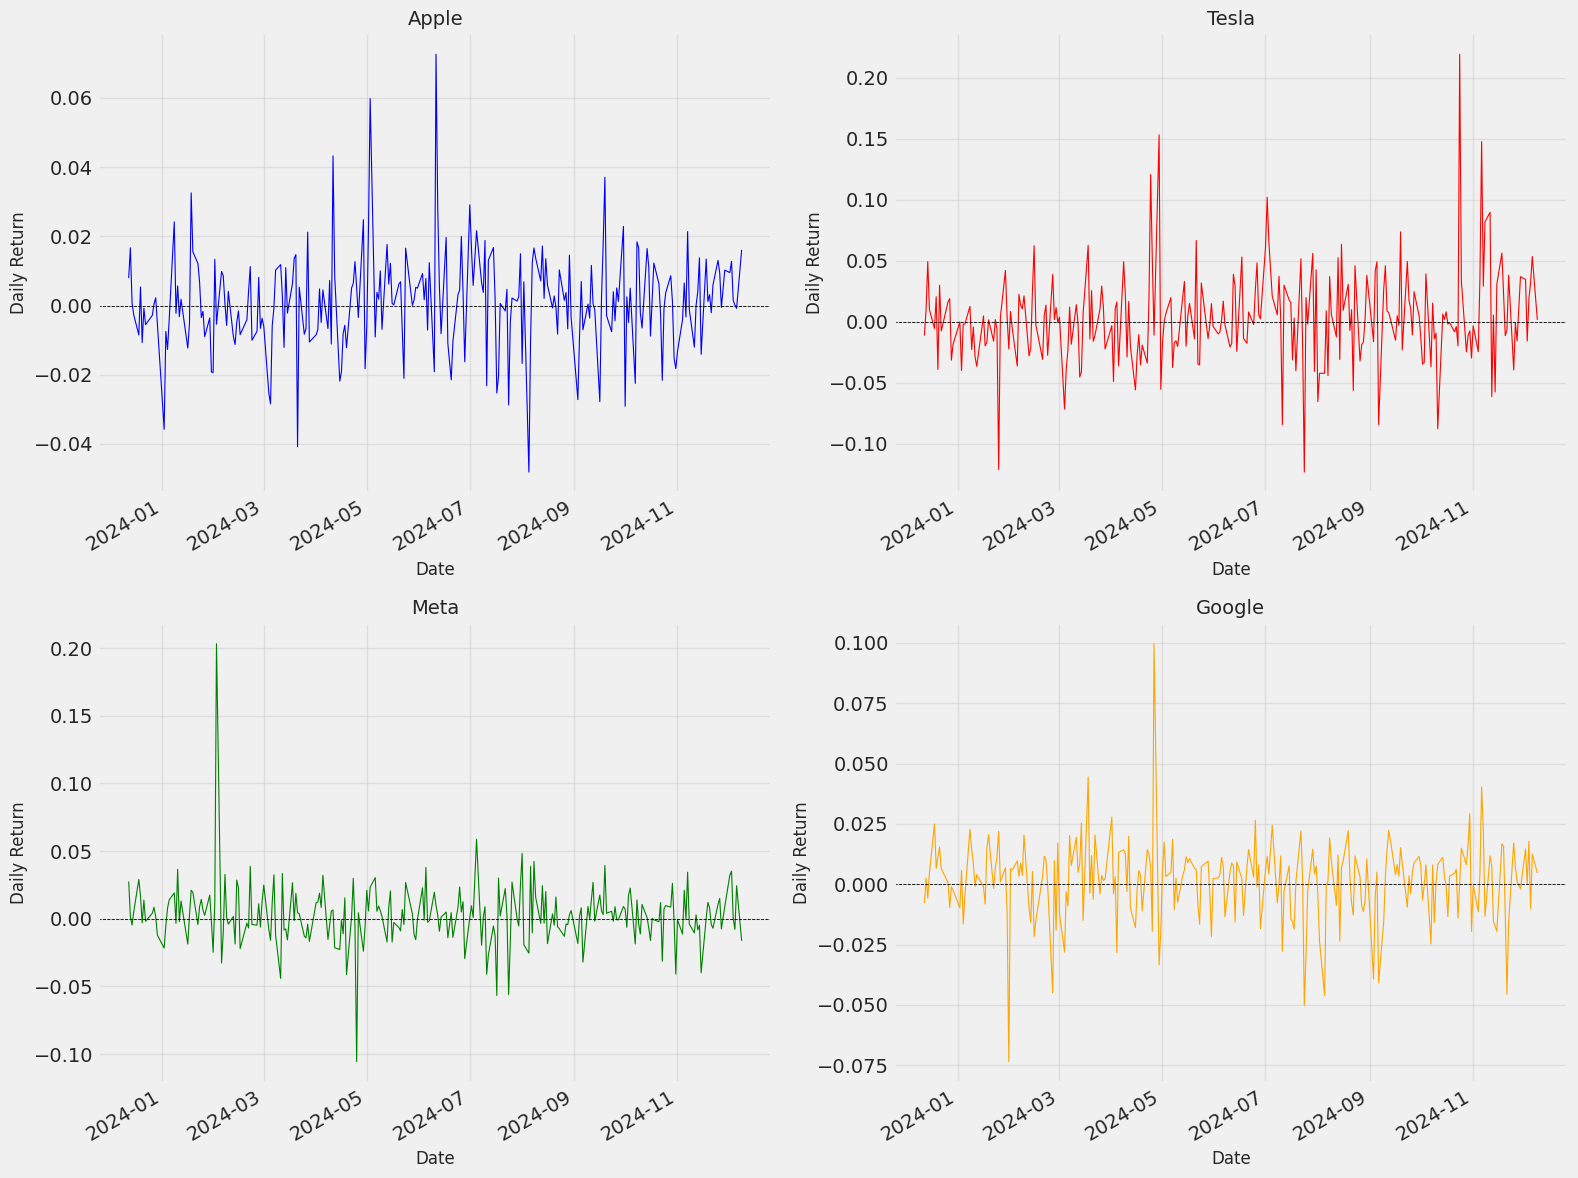

In [ ]:
# Creating a grid of subplots to visualize the daily return percentages for each company.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plotting the daily returns for Apple.
AAPL['Daily Return'].plot(ax=axes[0, 0], color='blue', linestyle='-', linewidth=0.8, legend=False)
axes[0, 0].set_title('Apple', fontsize=14)
axes[0, 0].set_ylabel('Daily Return', fontsize=12)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].axhline(0, color='black', linewidth=0.6, linestyle='--')
axes[0, 0].grid(alpha=0.5)

# Plotting the daily returns for Tesla.
TSLA['Daily Return'].plot(ax=axes[0, 1], color='red', linestyle='-', linewidth=0.8, legend=False)
axes[0, 1].set_title('Tesla', fontsize=14)
axes[0, 1].set_ylabel('Daily Return', fontsize=12)
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].axhline(0, color='black', linewidth=0.6, linestyle='--')
axes[0, 1].grid(alpha=0.5)

# Plotting the daily returns for Meta.
META['Daily Return'].plot(ax=axes[1, 0], color='green', linestyle='-', linewidth=0.8, legend=False)
axes[1, 0].set_title('Meta', fontsize=14)
axes[1, 0].set_ylabel('Daily Return', fontsize=12)
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].axhline(0, color='black', linewidth=0.6, linestyle='--')
axes[1, 0].grid(alpha=0.5)

# Plotting the daily returns for Google.
GOOG['Daily Return'].plot(ax=axes[1, 1], color='orange', linestyle='-', linewidth=0.8, legend=False)
axes[1, 1].set_title('Google', fontsize=14)
axes[1, 1].set_ylabel('Daily Return', fontsize=12)
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].axhline(0, color='black', linewidth=0.6, linestyle='--')
axes[1, 1].grid(alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


# **Interpretation**

By analyzing daily returns, we can assess the volatility and risk associated with each stock:

**Volatility:**
Stocks with larger swings in daily returns are more volatile and potentially riskier.

**Risk Assessment:**
Understanding daily returns helps in evaluating the potential for gains and losses, aiding in informed investment decisions.

This analysis provides a clear view of each stock's daily performance, highlighting periods of high and low volatility.

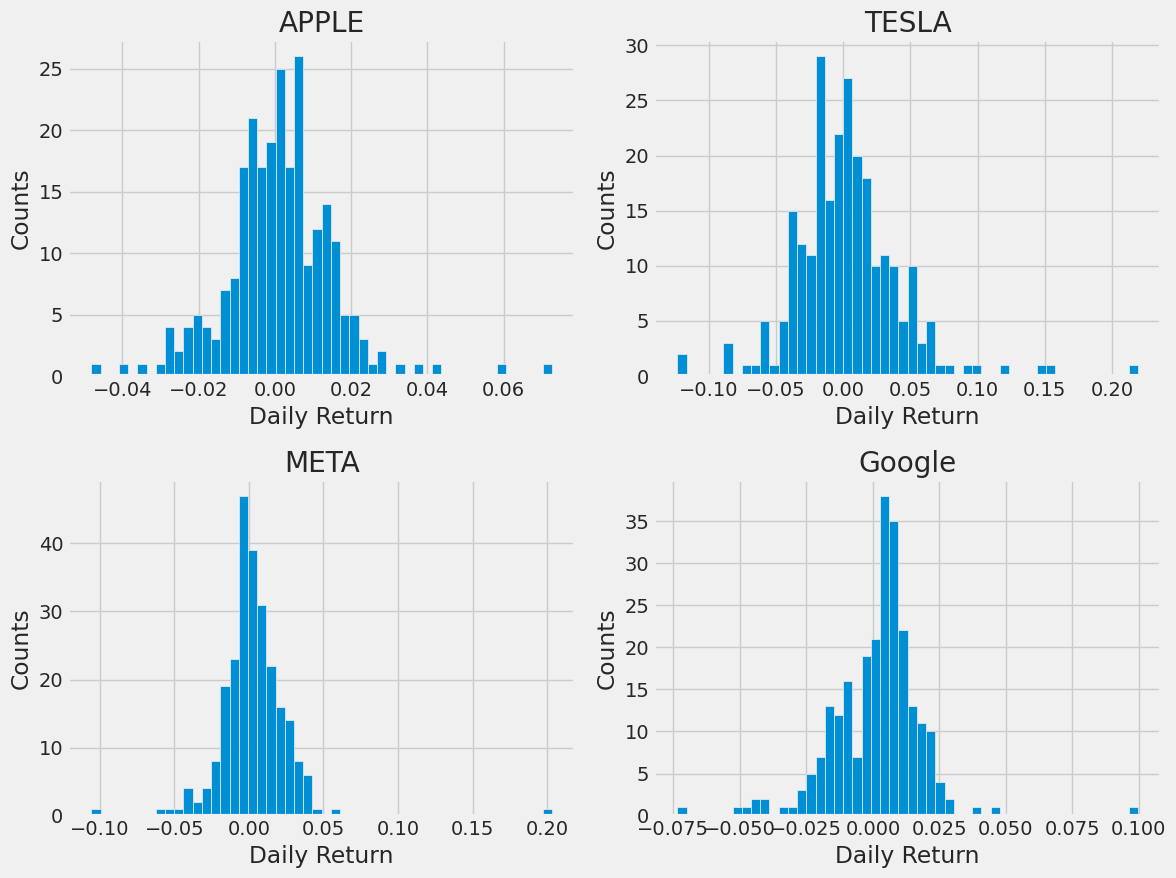

In [ ]:
# Plotting histograms of daily return distributions for multiple companies in a grid layout.

plt.figure(figsize=(12, 9)) # Create a figure with dimensions 12x9 inches to accommodate the subplots.

for i, company in enumerate(company_list, 1): # Enumerate over the company list, starting index at 1.
    plt.subplot(2, 2, i) # Create a subplot grid of 2 rows and 2 columns, placing the current plot in the ith position.
    company['Daily Return'].hist(bins=50) # Plot a histogram of the 'Daily Return' column with 50 bins for the current company.
    plt.xlabel('Daily Return') # Label the x-axis to indicate it represents daily return values.
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}') # Set the title for the current subplot using the company name.

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

The histograms show the frequency distribution of each stock’s daily returns. Most values cluster around 0%, indicating that small day-to-day changes are the most common outcome. This bell-shaped pattern suggests a roughly normal distribution of returns, where large positive or negative moves occur less frequently. By comparing the width of the distributions, we can gauge volatility—wider distributions indicate more variation in daily returns, which translates to higher risk. Such visualizations help investors quickly assess how stable or turbulent a stock’s performance is on a day-to-day basis.


# 4. What was the correlation between different stocks closing prices?

In this section, we analyze the correlation between the closing prices of different stocks. Correlation helps us understand how stocks move in relation to each other, which is valuable for making informed investment decisions.

# **What is Correlation and Why is It Important?**
**Correlation:**

A statistical measure that indicates the extent to which two variables move together. It ranges from -1.0 to +1.0.
+1.0: Perfect positive correlation (stocks move in the same direction).
-1.0: Perfect negative correlation (stocks move in opposite directions).
0: No correlation (no predictable relationship).

I**mportance:**

**Diversification:** Helps in building a diversified portfolio to minimize risk.
Investment Strategies: Informs decisions on which stocks to buy or sell based on their relationships.

**Risk Management:** Identifies how different stocks may affect the overall portfolio performance.

[*********************100%***********************]  1 of 1 completed


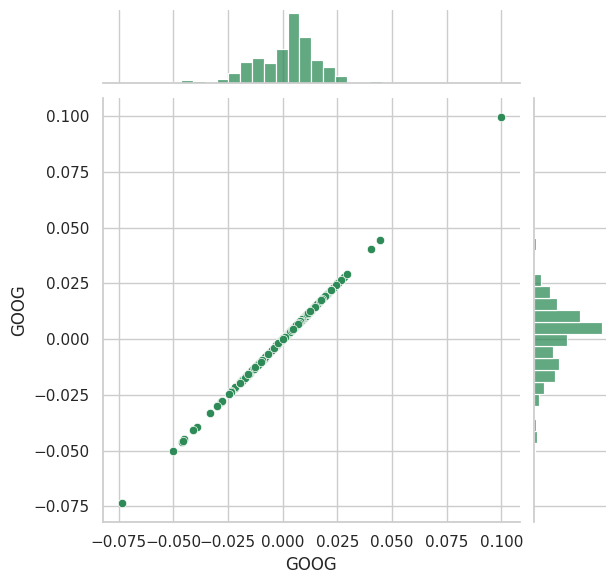

In [ ]:

# Comparing Google to itself should show a perfectly linear relationship

# Fetch stock data
tickers = ['GOOG']
try:
    stock_data = yf.download(tickers, start=start, end=end)
    # Calculate daily percentage returns
    stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
    tech_rets = stock_data[['Daily Return']].dropna()  # Remove NaN values

    # Rename column for visualization
    tech_rets.columns = ['GOOG']

    # Scatter plot for GOOGL's daily return against itself
    sns.set(style="whitegrid")
    sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
    plt.show()

except Exception as e:
    print("Error fetching stock data:", e)


In [ ]:
tech_rets.head() # Display the first 5 rows of the tech_rets DataFrame

,AAPL,TSLA,META,GOOG
Date,,,,
2023-12-12,0.007920,-0.007869,0.027484,-0.011387
2023-12-13,0.016691,0.002469,0.001556,0.009620
2023-12-14,0.000758,-0.005748,-0.004690,0.049145
2023-12-15,-0.002726,0.004805,0.005252,0.009759
2023-12-18,-0.008503,0.025030,0.028962,-0.005602





1.  This scatter plot shows Google's daily returns plotted against itself.
2. A perfect diagonal line indicates a perfect positive correlation, as expected when comparing a stock to itself.
3. The histograms on the top and right display the distribution of daily returns, which center around zero.




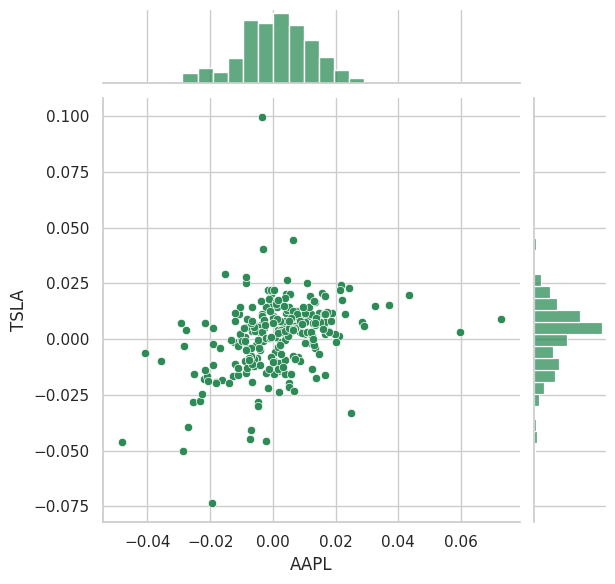

In [ ]:
# Create a scatter plot to visualize the relationship between daily returns of APPL and TSLA.
sns.set(style="whitegrid")
sns.jointplot(x='AAPL', y='TSLA', data=tech_rets, kind='scatter', color='seagreen')
# Create a joint plot displaying a scatterplot of AAPL returns vs TSLA returns.

plt.show()




1.   This scatter plot shows the daily returns of Tesla (TSLA)  versus Apple(AAPL).
2. The points are scattered, indicating no strong linear relationship. This suggests a weak correlation between the two stocks.
3. The histograms show each stock's return distribution.



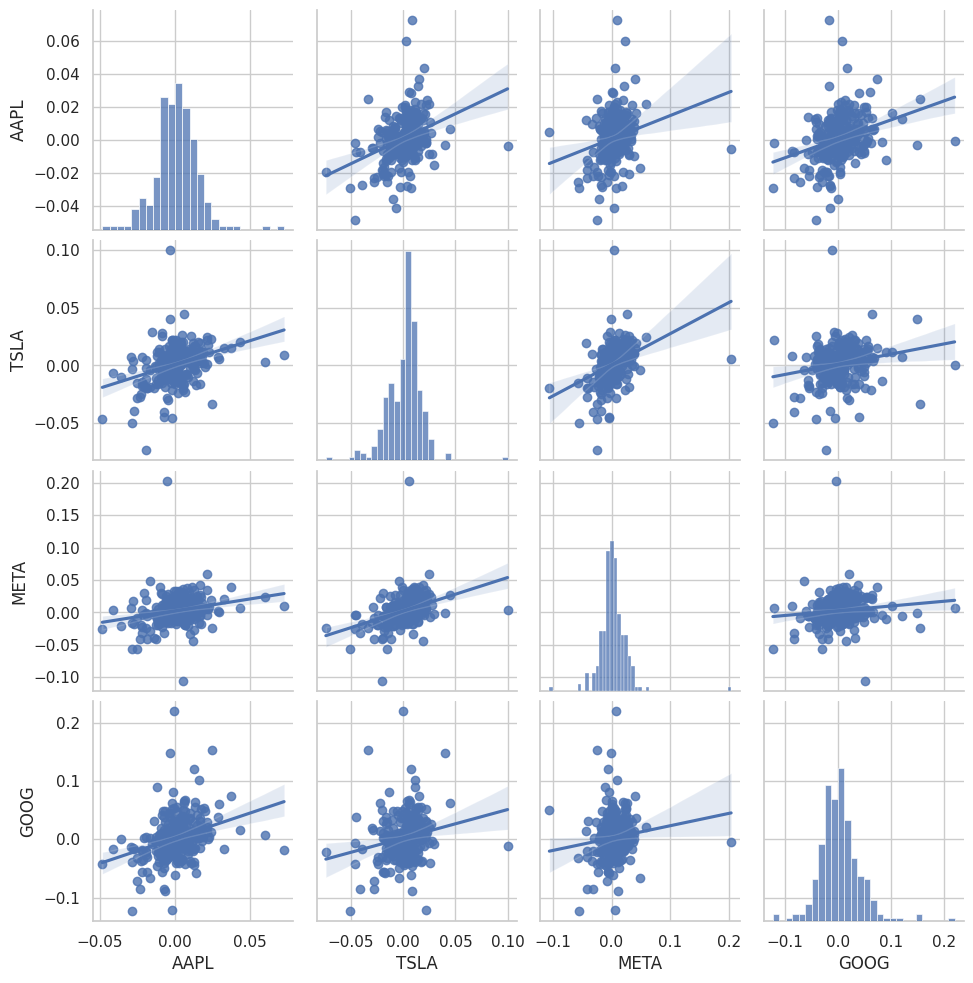

In [ ]:
# Generate a pairplot to visually analyze the relationships between all columns in the DataFrame.
# This automatically creates scatter plots for all pairwise comparisons of columns,
# and includes regression lines to show trends.

sns.pairplot(tech_rets, kind='reg')



1. This plot shows pairwise relationships between the daily returns of Apple (AAPL), Tesla (TSLA), Meta (META), and Google (GOOG).
2. Each diagonal plot displays a histogram of the daily return distribution for a single stock, illustrating its frequency of specific return values.
3. The scatter plots off the diagonal reveal how each pair of stocks moves in relation to one another. The presence of a fitted regression line and the general clustering of points indicate that most pairs exhibit positive correlations to varying degrees.
4. For example, AAPL and TSLA returns show a noticeable positive linear trend, while META and GOOG also demonstrate a clear upward pattern, suggesting that when one stock’s returns increase, the other’s tend to increase as well.





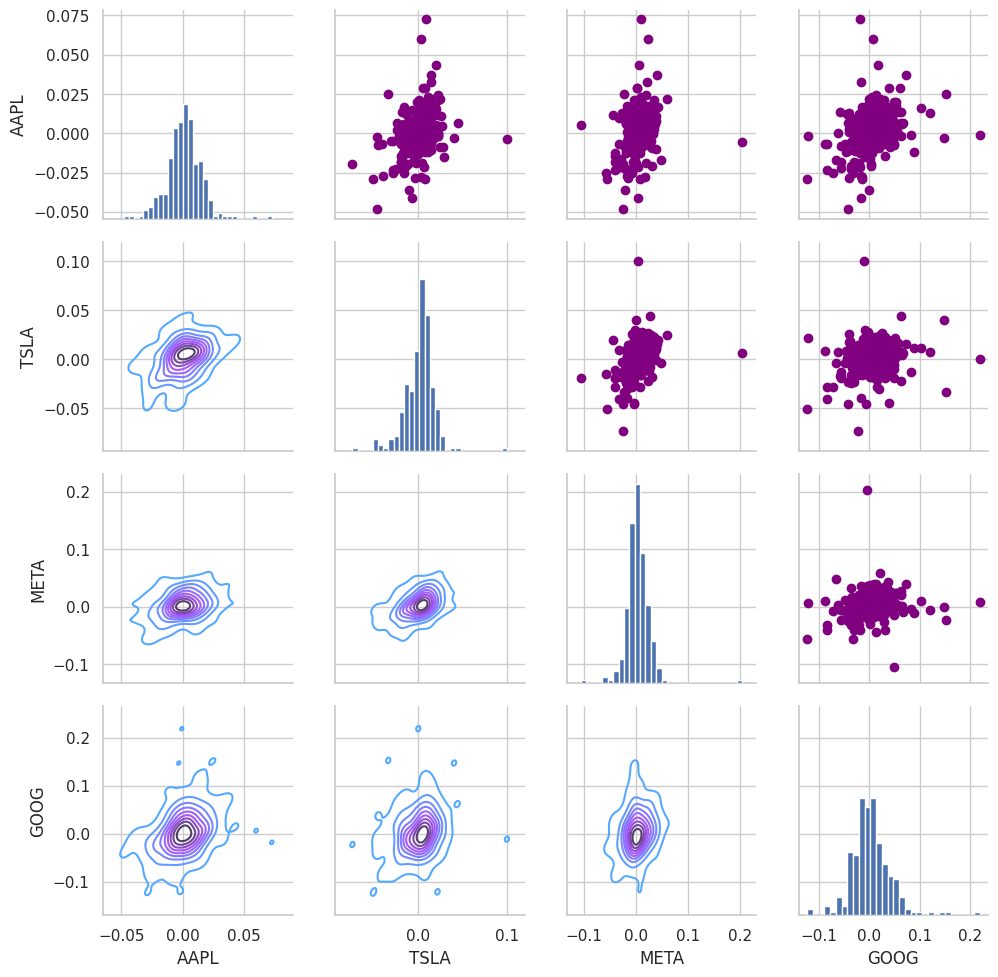

In [ ]:
# Set up a PairGrid to visualize pairwise relationships in the tech_rets DataFrame.
# Naming the grid as 'return_fig' for further customization of the plot.
return_fig = sns.PairGrid(tech_rets.dropna()) # Remove any missing values before creating the grid.

# Define the appearance of the upper triangle of the grid.
return_fig.map_upper(plt.scatter, color='purple') # Use scatter plots with purple color for the upper triangle.

# Define the appearance of the lower triangle of the grid.
return_fig.map_lower(sns.kdeplot, cmap='cool_d') # Use kernel density estimation (KDE) plots with a cool colormap.

# # Define the appearance of the diagonal in the grid.
return_fig.map_diag(plt.hist, bins=30) # Use histogram plots with 30 bins to display distributions along the diagonal.

Interpretation:

1. Diagonals (Histograms): Each stock’s daily returns are mostly centered around zero, indicating that small day-to-day changes are common.
2. Upper Triangle (Scatter Plots): Points show how two stocks’ returns vary together; a clear pattern would indicate correlation, but here relationships seem scattered.
3. Lower Triangle (KDE Contours): Contour plots highlight where two stocks’ returns frequently fall together, showing common ranges rather than strict linear trends.
4. Varied Plots for Deeper Insight: Combining histograms, scatter plots, and KDE contours provides a more complete picture of individual and joint stock behaviors.

Overall Conclusion: While all stocks hover around zero returns on average, there’s no strong, consistent correlation pattern visible among these particular stocks.



Text(0.5, 1.0, 'Correlation of stock closing price')

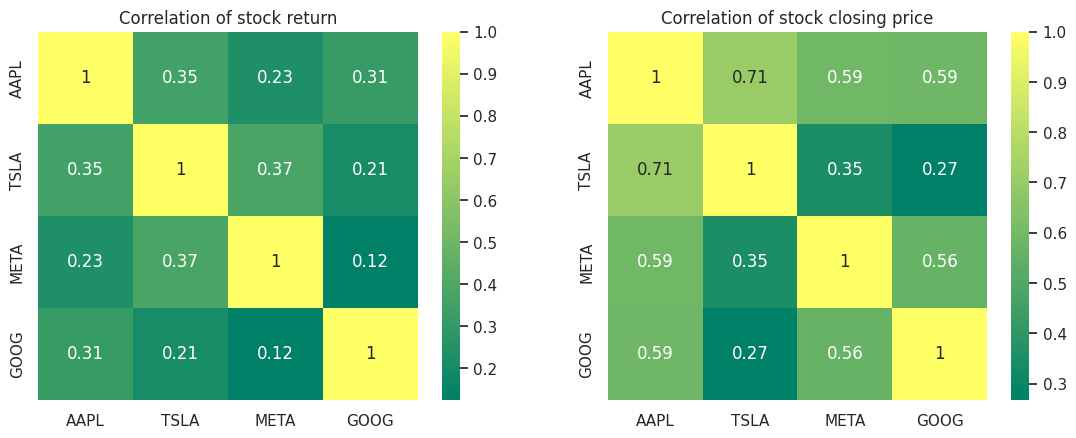

In [ ]:
# Create a figure to visualize the correlation heatmaps for stock returns and closing prices.
plt.figure(figsize=(12, 10))  # Set the figure size to 12x10 inches.

# Plot the heatmap for the correlation of stock returns.
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')# Plot the correlation matrix with annotations and a summer colormap.
plt.title('Correlation of stock return')

# Plot the heatmap for the correlation of stock closing prices.
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

1. Left Heatmap (Daily Returns): Shows the correlation of day-to-day returns. Correlation values are moderate, indicating that while these stocks sometimes move together, the relationships aren’t extremely strong.
2. Right Heatmap (Closing Prices): Indicates higher correlations for closing prices, suggesting that overall price trends align more consistently than short-term daily fluctuations.
3. AAPL and TSLA: Notably show a higher correlation in both returns and closing prices compared to other pairs.
4. META and GOOG: While correlated in closing price, they have weaker day-to-day return correlations.

Overall Conclusion: Stocks tend to align more strongly in their overall price trajectories than in their daily movements, aiding in understanding how to diversify or cluster stocks in a portfolio.

# **Key Observations**

1.Risk-Return Relationship:

GOOGL remains at the top-right corner, indicating it offers the highest potential return but also carries the most risk.
META shows a higher expected return than AAPL and TSLA, but at the cost of increased risk—positioned above and to the right of them.
Comparing Stocks:

AAPL and TSLA lie closer to the bottom-left, suggesting they have lower returns but also lower volatility.
META and GOOGL offer higher returns but come with greater day-to-day fluctuations in price.
Investor Considerations:

Risk-tolerant investors may lean towards GOOGL or META for higher reward potential, accepting more uncertainty.
Risk-averse investors may prefer AAPL or TSLA to minimize volatility, albeit with lower expected returns.
Portfolio Strategy:

Diversifying across stocks with varying risk-return profiles can help balance a portfolio, potentially stabilizing overall performance while still capturing some growth.



# **5. How much value do we put at risk by investing in a particular stock?**

**Risk Analysis:** Quantifying Value at Risk
In this section, we quantify the risk of investing in different stocks using their expected returns (mean daily return) and risk (standard deviation of daily returns). This visualization helps in understanding the trade-off between risk and return for each stock.

1. The scatter plot clearly maps the expected return (X-axis) against the risk (Y-axis) for each stock, making it easier to interpret the trade-off.
2. Each stock is represented as a point, showing its unique position in the risk-return space.

**Axes:**

1. X-Axis (Expected Return): The mean daily return of each stock. Positive values indicate potential gains, while negative values indicate potential losses.
2. Y-Axis (Risk): The standard deviation of daily returns, representing the volatility or risk.

**Scatter Points:**

1. Each point represents a stock. Its position reflects the trade-off between risk and expected return.
2. For example:
AAPL: Low risk with a slightly negative return.
META: Moderate risk with a positive return.
GOOGL: Highest risk with the highest expected return.

Annotations:
Arrows and labels indicate the stock name, making it easy to identify each point on the plot.

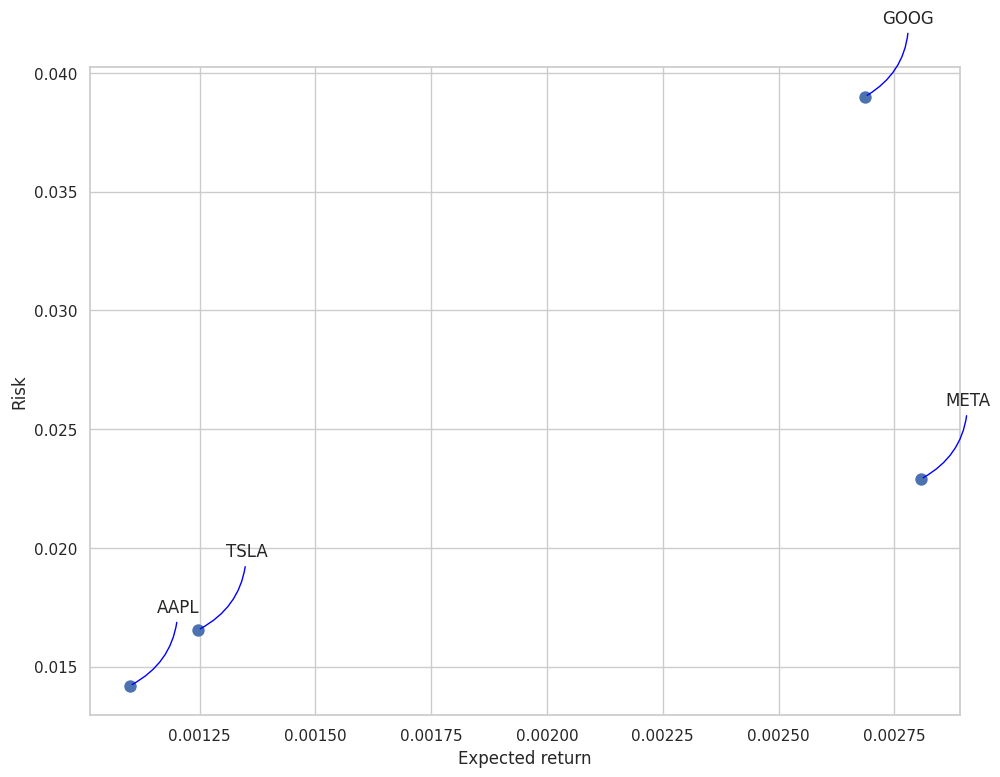

In [ ]:
# Remove any missing values (NaN) from the returns DataFrame to prepare for analysis.

rets = tech_rets.dropna()

# Define the size of the scatter plot points.
area = np.pi * 20  # Set the area of each scatter plot point.

# Create a scatter plot to visualize the relationship between expected return and risk.
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point in the scatter plot with the corresponding stock label.
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# **Key Observations**

1. Risk-Return Relationship:
GOOGL remains at the top-right corner, indicating it offers the highest potential return but also carries the most risk.
META shows a higher expected return than AAPL and TSLA, but at the cost of increased risk—positioned above and to the right of them.

2. Comparing Stocks:
AAPL and TSLA lie closer to the bottom-left, suggesting they have lower returns but also lower volatility.
META and GOOGL offer higher returns but come with greater day-to-day fluctuations in price.

3. Investor Considerations:
Risk-tolerant investors may lean towards GOOGL or META for higher reward potential, accepting more uncertainty.
Risk-averse investors may prefer AAPL or TSLA to minimize volatility, albeit with lower expected returns.

4. Portfolio Strategy:
Diversifying across stocks with varying risk-return profiles can help balance a portfolio, potentially stabilizing overall performance while still capturing some growth.


# **Challenges**

**Data Reliability:**

1. Data sourced from platforms like Yahoo Finance (via the yfinance library) may not always be up-to-date or accurate.
2. Missing data and inconsistent timeframes can complicate analysis.

**Stock Market Volatility:**

1. Market trends change frequently, making it difficult to rely on historical data for future predictions.
2. The daily returns analyzed here might not account for sudden external factors like global crises or company-specific events.
**Simplistic Risk Assessment:**

1. Risk analysis using only standard deviation and expected returns oversimplifies the complexity of financial markets.
2. Advanced metrics such as Value at Risk (VaR) or Beta could provide a more nuanced perspective.
**Correlation Limitations:**

1. Positive or negative correlations between stocks don’t imply causation.
2. Correlation does not consider time lags or dynamic relationships between stocks.

**Computational Complexity for Larger Datasets:**

1. Analyzing a larger number of stocks or longer time periods could lead to higher computational costs.
2. Visualizations may become cluttered and harder to interpret.

# **Future Scope**
**Advanced Risk Metrics:**

 1. Incorporate more sophisticated risk measures, such as Value at Risk (VaR), Conditional VaR, or Sharpe Ratio, to provide deeper insights into stock performance.

**Machine Learning Models:**

1. Use machine learning techniques like LSTMs or Random Forests for stock price prediction.
2. Implement clustering algorithms to group stocks based on performance or risk characteristics.
**Real-Time Data Integration:**

1. Include real-time stock price analysis to make the project more dynamic and suitable for real-world applications.
2. Use APIs that provide streaming data for real-time updates.
**Sector-Wide Analysis:**

1. Expand the analysis to include stocks from various sectors, providing a broader understanding of market dynamics.
2. Compare inter-sector correlations to understand diversification benefits.
**Portfolio Optimization:**

1. Build a portfolio optimization model that minimizes risk and maximizes return based on the risk-return trade-offs identified in this project.
2. Use techniques like Modern Portfolio Theory (MPT) for diversification strategies.
**Interactive Dashboards:**

1. Develop an interactive dashboard using tools like Tableau, Power BI, or Python libraries (e.g., Dash, Streamlit) to allow users to explore the data and analysis interactively.
**Macro-Economic Integration:**

1. Incorporate macro-economic indicators (e.g., inflation, interest rates) to assess their impact on stock performance and correlations.

# **Conclusion:**
 Project provides valuable insights into the behavior of technology stocks (AAPL, TSLA, META, and GOOG) by analyzing their daily returns, correlations, and risk-return profiles. Key findings include:

**Data-Driven Insights:**

1. Higher returns often come with higher risk, as observed with TSLA and GOOG, while AAPL shows lower risk with steady returns.
2. Correlation analysis revealed relationships between stocks, supporting portfolio diversification.

**Visualization Techniques:**

1. Scatter plots, heatmaps, and moving average visualizations effectively highlighted trends and patterns in stock behavior.
2. Annotations and density plots added clarity to the analysis.
Investment Relevance:

The risk-return trade-offs identified provide guidance for tailoring investment strategies based on individual risk preferences.
Overall, this analysis equips investors with a deeper understanding of stock trends and behaviors, offering a foundation for more advanced financial modeling and portfolio management in the future.